In [132]:
#Function for plotting decision boundaries later
%matplotlib inline
# Import useful libraries.
import matplotlib.pyplot as plt
#Build Plot Function
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y, stepsize=.05):
    cmap_light = ListedColormap(['#FFAAAA', '#BBFFBB', '#AAAAFF'])  # color map for background
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])  # color map for points
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, stepsize),
                         np.arange(y_min, y_max, stepsize))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    print("Rendering Plot")
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)

In [134]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

fileURL = 'https://gitlab.com/jgarrard/MLB/raw/master/data/cleanPitchingData.csv'
data = pd.read_csv(fileURL)
data = data.set_index('index')
#Drop the invalid all-star years
data = data.drop(data.loc[data['yearID']==1981].index)
data = data.drop(data.loc[data['yearID']==1994].index)

In [135]:
#Clean the ERA data so we can get a better look at it on the graph
temp = data.loc[data['ERA'] <20]
stars = temp.loc[temp['AllStar']==True]
notstars = temp.loc[temp['AllStar']==False]
YeraStar = stars['ERA'].values
XeraStar = stars['BFP'].values
Yera = notstars['ERA'].values
Xera = notstars['BFP'].values

In [136]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(Xera, Yera, c='r', marker="o", label='Not All Star')
ax1.scatter(XeraStar, YeraStar, c='b', marker="s", label='All Star')
plt.legend(loc='upper right');
plt.title('Scatter plot ERA v. BFP')
plt.xlabel('Batters Faced by Pitcher')
plt.ylabel('Earned Run Average')
plt.show()

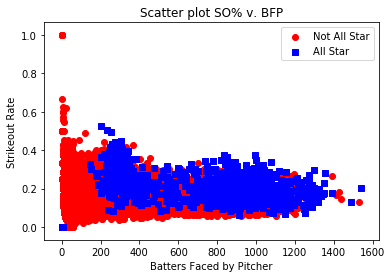

In [138]:
YsoStar = stars['SO%'].values
XsoStar = stars['BFP'].values
Yso = notstars['SO%'].values
Xso = notstars['BFP'].values

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(Xso, Yso, c='r', marker="o", label='Not All Star')
ax1.scatter(XsoStar, YsoStar, c='b', marker="s", label='All Star')
plt.legend(loc='upper right');
plt.title('Scatter plot SO% v. BFP')
plt.xlabel('Batters Faced by Pitcher')
plt.ylabel('Strikeout Rate')
plt.show()

# At this point, it's clear we have outliers among the All-Stars in the pitching data who threw significantly fewer pitches than our other All-Stars

In [139]:
stars.loc[stars['BFP'] < 100]

playerID  yearID  stint teamID  W  L  G  GS  CG  SHO ...   \
index                                                                ...    
wallati011987  wallati01    1987      1    MON  0  0  1   0   0    0 ...    
wallati011989  wallati01    1989      1    MON  0  0  1   0   0    0 ...    
cuddymi012011  cuddymi01    2011      1    MIN  0  0  1   0   0    0 ...    

               IBB  WP  HBP  BK  BFP  GF  R  AllStar  legID  SO%  
index                                                             
wallati011987  0.0   0  0.0   0  3.0   1  0     True      1  0.0  
wallati011989  0.0   0  0.0   1  4.0   1  1     True      1  0.0  
cuddymi012011  0.0   0  0.0   0  6.0   1  0     True      2  0.0  

[3 rows x 29 columns]

# After investigating these three cases, they were position players who were selected as All-Stars for their positions, but they were called upon to pitch during the season (which is why they generated pitching data!)

In [140]:
#Drop these oddballs from the data set; keep original to compare the impact of ditching these problematic points
data_C = data.drop(stars.loc[stars['BFP'] < 100].index)

In [141]:
#split the original data into features and class
y = data['AllStar']
x = data.drop(columns = 'AllStar')
x = x.drop(columns = ['playerID','yearID','stint','teamID'])

#split clean data
y_C = data_C['AllStar']
x_C = data_C.drop(columns = 'AllStar')
x_C = x_C.drop(columns = ['playerID','yearID','stint','teamID'])


In [142]:
#Any ERA>20 is ridiculous, remove that noise
y_C = y_C.drop(x.loc[x['ERA']>20].index)
x_C = x_C.drop(x.loc[x['ERA']>20].index)
y = y.drop(x.loc[x['ERA']>20].index)
x = x.drop(x.loc[x['ERA']>20].index)

In [143]:
#Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_Ctrain, x_Ctest, y_Ctrain, y_Ctest = train_test_split(x_C, y_C, test_size=0.2)

In [145]:
#The Kitchen Sink Approach
print("Not Cleaned:")
for i in range (1,100,5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)
    accuracy = np.average(y_test == y_pred)
    print("Accuracy ", i,":", accuracy)

print("\nCleaned:")
for i in range (1,100,5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_Ctrain, y_Ctrain)

    y_pred = knn.predict(x_Ctest)
    accuracy = np.average(y_Ctest == y_pred)
    print("Accuracy ", i,":", accuracy)

Not Cleaned:
Accuracy  1 : 0.9446581196581196
Accuracy  6 : 0.9572649572649573
Accuracy  11 : 0.9585470085470086
Accuracy  16 : 0.9587606837606838
Accuracy  21 : 0.9583333333333334
Accuracy  26 : 0.9587606837606838
Accuracy  31 : 0.9587606837606838
Accuracy  36 : 0.9591880341880342
Accuracy  41 : 0.9585470085470086
Accuracy  46 : 0.9581196581196582
Accuracy  51 : 0.9596153846153846
Accuracy  56 : 0.958974358974359
Accuracy  61 : 0.958974358974359
Accuracy  66 : 0.9587606837606838
Accuracy  71 : 0.9585470085470086
Accuracy  76 : 0.9581196581196582
Accuracy  81 : 0.9583333333333334
Accuracy  86 : 0.9594017094017094
Accuracy  91 : 0.958974358974359
Accuracy  96 : 0.9583333333333334

Cleaned:
Accuracy  1 : 0.946569779867493
Accuracy  6 : 0.9621714041461851
Accuracy  11 : 0.9598204744603548
Accuracy  16 : 0.961530241504595
Accuracy  21 : 0.961102799743535
Accuracy  26 : 0.9613165206240649
Accuracy  31 : 0.9598204744603548
Accuracy  36 : 0.9604616371019449
Accuracy  41 : 0.9606753579824749
A

### /*Results from one of my trials*/
### Not Cleaned:

Accuracy  1 : 0.9446581196581196

Accuracy  6 : 0.9572649572649573

Accuracy  11 : 0.9585470085470086

Accuracy  16 : 0.9587606837606838

Accuracy  21 : 0.9583333333333334

Accuracy  26 : 0.9587606837606838

Accuracy  31 : 0.9587606837606838

Accuracy  36 : 0.9591880341880342

Accuracy  41 : 0.9585470085470086

Accuracy  46 : 0.9581196581196582

Accuracy  51 : 0.9596153846153846

Accuracy  56 : 0.958974358974359

Accuracy  61 : 0.958974358974359

Accuracy  66 : 0.9587606837606838

Accuracy  71 : 0.9585470085470086

Accuracy  76 : 0.9581196581196582

Accuracy  81 : 0.9583333333333334

Accuracy  86 : 0.9594017094017094

Accuracy  91 : 0.958974358974359

Accuracy  96 : 0.9583333333333334

### Cleaned:

Accuracy  1 : 0.946569779867493

Accuracy  6 : 0.9621714041461851

Accuracy  11 : 0.9598204744603548

Accuracy  16 : 0.961530241504595

Accuracy  21 : 0.961102799743535

Accuracy  26 : 0.9613165206240649

Accuracy  31 : 0.9598204744603548

Accuracy  36 : 0.9604616371019449

Accuracy  41 : 0.9606753579824749

Accuracy  46 : 0.961743962385125

Accuracy  51 : 0.9613165206240649

Accuracy  56 : 0.961102799743535

Accuracy  61 : 0.9613165206240649

Accuracy  66 : 0.9608890788630049

Accuracy  71 : 0.9608890788630049

Accuracy  76 : 0.9613165206240649

Accuracy  81 : 0.9613165206240649

Accuracy  86 : 0.961530241504595

Accuracy  91 : 0.961957683265655

Accuracy  96 : 0.9613165206240649

### /*The model trained on the cleaned data (the one without the three position players who "pitched") is roughly a whole percentage point better!!*/

In [146]:
for i in range (5,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_Ctrain, y_Ctrain)

    y_pred = knn.predict(x_Ctest)
    accuracy = np.average(y_Ctest == y_pred)
    print("Accuracy ", i,":", accuracy)

Accuracy  5 : 0.9600341953408849
Accuracy  6 : 0.9621714041461851
Accuracy  7 : 0.9583244282966445
Accuracy  8 : 0.961743962385125
Accuracy  9 : 0.9600341953408849
Accuracy  10 : 0.9596067535798247


### /*Results from the same trial*/
Accuracy  5 : 0.9600341953408849

Accuracy  6 : 0.9621714041461851

Accuracy  7 : 0.9583244282966445

Accuracy  8 : 0.961743962385125

Accuracy  9 : 0.9600341953408849

Accuracy  10 : 0.9596067535798247
### 6 Neighbors is our most accurate model!

In [147]:
x_train2 = x_Ctrain[['BFP','BAOpp','SHO']]
x_test2 = x_Ctest[['BFP','BAOpp','SHO']]
knn2 = KNeighborsClassifier(n_neighbors=6)
knn2.fit(x_train2, y_Ctrain)
y_pred2 = knn2.predict(x_test2)
acc2 = np.average(y_Ctest == y_pred2)
print("Accuracy: ",acc2)

Accuracy:  0.953622568924984


### /*Continuing trial, isolating features indicated by PCA as explaining most variability*/
Accuracy:  0.953622568924984

In [148]:
x_train3 = x_Ctrain[['ERA','SO%']]
x_test3 = x_Ctest[['ERA','SO%']]
knn3 = KNeighborsClassifier(n_neighbors=6)
knn3.fit(x_train3, y_Ctrain)
y_pred3 = knn3.predict(x_test3)
acc3 = np.average(y_Ctest == y_pred3)
print("Accuracy: ", acc3)
plot_decision_boundary(knn3, x_train3, y_Ctrain)
plt.title("16 Nearest")

Accuracy:  0.9551186150886941
Rendering Plot


Text(0.5,1,'16 Nearest')

### /* Isolating ERA and SO%, two features that do not depend on # of games played*/
Accuracy:  0.9551186150886941
### These two features were better!

In [149]:
x_train4 = x_Ctrain[['ERA','SO%','BAOpp']]
x_test4 = x_Ctest[['ERA','SO%','BAOpp']]
knn4 = KNeighborsClassifier(n_neighbors=6)
knn4.fit(x_train4, y_Ctrain)
y_pred4 = knn4.predict(x_test4)
acc4 = np.average(y_Ctest == y_pred4)
print("Accuracy: ", acc4)

Accuracy:  0.9553323359692242


### Trying mixing features independent of number of games played w/ dependent features
Accuracy:  0.9553323359692242
### Performing minimally better than the two that don't depend on # of games played

In [150]:
x_train5 = x_Ctrain[['ERA','SO%','BFP']]
x_test5 = x_Ctest[['ERA','SO%','BFP']]
knn5 = KNeighborsClassifier(n_neighbors=6)
knn5.fit(x_train5, y_Ctrain)
y_pred5 = knn5.predict(x_test5)
acc5 = np.average(y_Ctest == y_pred5)
print("Accuracy: ", acc5)

Accuracy:  0.9546911733276341


### This combo was not as good
Accuracy:  0.9546911733276341

In [151]:
#Train and test a decision tree classifier
from sklearn.tree import DecisionTreeClassifier

print("Not Cleaned")
for i in range(1,40,5):
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(x_train, y_train)

    y_pred = dtc.predict(x_test)
    accuracy = np.average(y_test == y_pred)
    print("Accuracy ", i,":", accuracy)

print("\nCleaned")
for i in range(1,40,5):
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(x_Ctrain, y_Ctrain)

    y_pred = dtc.predict(x_Ctest)
    accuracy = np.average(y_Ctest == y_pred)
    print("Accuracy ", i,":", accuracy)

Not Cleaned
Accuracy  1 : 0.9489316239316239
Accuracy  6 : 0.957905982905983
Accuracy  11 : 0.9504273504273504
Accuracy  16 : 0.9452991452991453
Accuracy  21 : 0.941025641025641
Accuracy  26 : 0.9423076923076923
Accuracy  31 : 0.9442307692307692
Accuracy  36 : 0.9403846153846154

Cleaned
Accuracy  1 : 0.9557597777302842
Accuracy  6 : 0.961530241504595
Accuracy  11 : 0.9516990810002137
Accuracy  16 : 0.9472109425090831
Accuracy  21 : 0.9444325710621928
Accuracy  26 : 0.9450737337037829
Accuracy  31 : 0.9437914084206027
Accuracy  36 : 0.9442188501816627


### /*Comparing the dataset with and without the three anomalous data points*/
### Not Cleaned

Accuracy  1 : 0.9489316239316239

Accuracy  6 : 0.957905982905983

Accuracy  11 : 0.9504273504273504

Accuracy  16 : 0.9452991452991453

Accuracy  21 : 0.941025641025641

Accuracy  26 : 0.9423076923076923

Accuracy  31 : 0.9442307692307692

Accuracy  36 : 0.9403846153846154

### Cleaned

Accuracy  1 : 0.9557597777302842

Accuracy  6 : 0.961530241504595

Accuracy  11 : 0.9516990810002137

Accuracy  16 : 0.9472109425090831

Accuracy  21 : 0.9444325710621928

Accuracy  26 : 0.9450737337037829

Accuracy  31 : 0.9437914084206027

Accuracy  36 : 0.9442188501816627

### /*Again, removing those three data points brought our accuracy up nearly a half a percentage!*/

In [152]:
for i in range(1,10):
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(x_Ctrain, y_Ctrain)

    y_pred = dtc.predict(x_Ctest)
    accuracy = np.average(y_Ctest == y_pred)
    print("Accuracy ", i,":", accuracy)

Accuracy  1 : 0.9557597777302842
Accuracy  2 : 0.9583244282966445
Accuracy  3 : 0.9591793118187647
Accuracy  4 : 0.9598204744603548
Accuracy  5 : 0.9604616371019449
Accuracy  6 : 0.961957683265655
Accuracy  7 : 0.9581107074161146
Accuracy  8 : 0.9572558238939944
Accuracy  9 : 0.9568283821329344


### Looks like max depth should be 6

Accuracy  1 : 0.9557597777302842

Accuracy  2 : 0.9583244282966445

Accuracy  3 : 0.9591793118187647

Accuracy  4 : 0.9598204744603548

Accuracy  5 : 0.9604616371019449

Accuracy  6 : 0.961957683265655

Accuracy  7 : 0.9581107074161146

Accuracy  8 : 0.9572558238939944

Accuracy  9 : 0.9568283821329344

In [156]:
#Using just 'BFP','BAOpp','SHO'
dtc2 = DecisionTreeClassifier(max_depth=6)
dtc2.fit(x_train2, y_Ctrain)
y_pred2 = dtc2.predict(x_test2)
accuracy = np.average(y_Ctest == y_pred2)
print("Accuracy: ",accuracy)

Accuracy:  0.9561872194913443


### Testing the three features dependent on # games
Accuracy:  0.9561872194913443

Accuracy:  0.9546911733276341
Rendering Plot


Text(0.5,1,'Decision Tree Classifier: SO% v ERA')

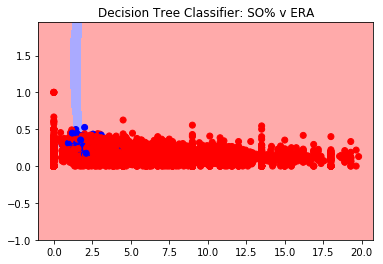

In [157]:
#Using just ERA, SO%
dtc3 = DecisionTreeClassifier(max_depth=6)
dtc3.fit(x_train3, y_Ctrain)
y_pred3 = dtc3.predict(x_test3)
accuracy = np.average(y_Ctest == y_pred3)
print("Accuracy: ",accuracy)
plot_decision_boundary(knn3, x_train3, y_Ctrain)
plt.title("Decision Tree Classifier: SO% v ERA")

### Testing the ERA & SO% (features independent of the # games played)
Accuracy:  0.9546911733276341

In [158]:
#Using just 'ERA','SO%','BAOpp'
dtc4 = DecisionTreeClassifier(max_depth=6)
dtc4.fit(x_train4, y_Ctrain)
y_pred4 = dtc4.predict(x_test4)
accuracy = np.average(y_Ctest == y_pred4)
print("Accuracy: ",accuracy)

Accuracy:  0.9555460568497542


### Testing a blend
Accuracy:  0.9555460568497542

In [160]:
#Using just 'ERA','SO%','BFP'
dtc5 = DecisionTreeClassifier(max_depth=6)
dtc5.fit(x_train5, y_Ctrain)
y_pred5 = dtc4.predict(x_test5)
accuracy2 = np.average(y_Ctest == y_pred5)
print("Accuracy: ",accuracy2)

Accuracy:  0.9557597777302842


### Another blend
Accuracy:  0.9557597777302842

# Comparing these classification methods across different groups of relevant features, the K Nearest Neighbors with 6 neighbors would be best for our purposes. With KNN, our model with just ERA and SO% performed better than any model based on features which are dependent on the number of games played (such as Batters Faced by Pitcher or Batting Average of Opponent).

# This is ideal because the MLB All-Star game is played at the midpoint of the season. ERA and SO% are independent of the number of games played by a pitcher, so we could use the model based on these features in order to predict All-Star pitchers BEFORE the season ends and all the games have been played. Since BFP and BAOpp statistics in this dataset are based on a full season of play, we could not use these models to predict pitcher performance at any point in the season. With the KNN model w/ 6 neighbors based on ERA and SO% we can do this midseason All-Star prediction with ~95.5% accuracy!